<h1 style="font-weight:bold;font-family:'JetBrains Mono';color:#b4befe">Machine Learning - Binary Dataset Classification</h1>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Import delle Librerie</h4>

In [1]:
import numpy as np # used for numerical operations
import pandas as pd # used for data manipulation and analysis
import plotly.express as px # used for creating interactive plots
import plotly.graph_objects as go # used for creating interactive plots
import pickle as pkl # used for saving and loading models
from colorama import Fore as fc # used for colored text
from colorama import Style as sc # used for colored text
from matplotlib import pyplot as plt # used for creating plots
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold # used for splitting the data into training and testing sets
from sklearn.linear_model import Perceptron # used for creating a Perceptron model
from sklearn.metrics import accuracy_score # used for calculating the accuracy of the model
from sklearn.preprocessing import StandardScaler # used for scaling the data
from sklearn.linear_model import LogisticRegression # used for creating a Logistic Regression model
from sklearn.metrics import precision_score, recall_score, f1_score # used for calculating the precision, recall, and F1 score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # used for creating a confusion matrix
from sklearn.feature_selection import RFECV # used for recursive feature elimination
from sklearn.model_selection import GridSearchCV # used for hyperparameter tuning
from sklearn.metrics import roc_curve, roc_auc_score # used for creating a ROC curve
from sklearn.ensemble import RandomForestClassifier # used for creating a Random Forest model
from sklearn.naive_bayes import GaussianNB # used for creating a Naive Bayes model
from sklearn.svm import SVC # used for creating a Support Vector Machine model

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Preprocessing di 'banana_quality.csv'</h4>

In [2]:
Dataset = pd.read_csv('banana_quality.csv')

pd.set_option('future.no_silent_downcasting', True)

# Replace the strings with corresponding numbers
def to_numeric(column_name):
    possible = Dataset[column_name].unique()
    corresponding = list(range(len(possible)))
    # Replace the categorical values with numeric values, set dtype to int
    Dataset.replace({column_name: dict(zip(possible, corresponding))}, inplace=True)
    Dataset[column_name] = Dataset[column_name].astype('int64')
    return dict(zip(possible, corresponding))

print(f'{sc.BRIGHT}REPLACED COLUMNS{sc.NORMAL}')
for column in Dataset.columns:
    if not np.issubdtype(Dataset[column].dtype, np.number):
        print(f'{fc.YELLOW}Column {column}:{fc.RESET} {to_numeric(column)}\n')

# Fill the missing values with the mean of the column
Dataset.fillna(Dataset.mean(), inplace=True)

# Split the data into features and target
X = Dataset.drop('Quality', axis=1)
X_values = X.values
y = Dataset['Quality']
X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size=0.2, random_state=42)

print(f'{sc.BRIGHT}DATASET CHARACTERISTICS{sc.NORMAL}')
print(f'{fc.RED}Features{fc.RESET}: {X.columns.to_list()}')
print(f'{fc.GREEN}Target{fc.RESET}: {y.unique()}')
print(f'{fc.BLUE}Shape of the dataset{fc.RESET}: {Dataset.shape}')


REPLACED COLUMNS
Column Quality: {'Good': 0, 'Bad': 1}

DATASET CHARACTERISTICS
Features: ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
Target: [0 1]
Shape of the dataset: (8000, 8)


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Standardizzazione del Dataset</h4>

In [3]:
StdSc = StandardScaler()
StdSc.fit(X_train)

# Rescale the training and testing sets
X_train = StdSc.transform(X_train)
X_test = StdSc.transform(X_test)

# Show the correlation matrix of the rescaled features
print(f'{sc.BRIGHT}CORRELATION MATRIX{sc.NORMAL}')
# Use label names instead of numbers
correlation_matrix = pd.DataFrame(X_train).corr()
correlation_matrix.columns = X.columns
correlation_matrix.index = X.columns
# Plot the correlation matrix
Figure = px.imshow(correlation_matrix, title='Correlation Matrix', height=600, width=600)
Figure.show()

CORRELATION MATRIX


<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#cba6f7">Linear Model - Perceptron</h2>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Creazione del modello</h4>

In [4]:
ppn = Perceptron(max_iter=50, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

# Show the performance of the Perceptron model
print(f'{sc.BRIGHT}PERCEPTRON MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

PERCEPTRON MODEL

Accuracy: 85.00%
Precision: 91.17%
Recall: 76.70%
F1 Score: 83.31%


In [5]:
# Make some predictions using the Perceptron model
for xtest, ytest in zip(X_test, y_test):
    ypred = ppn.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {f"{fc.GREEN}CORRECT{fc.RESET}" if ypred == ytest else f"{fc.RED}WRONG{fc.RESET}"} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 1
Result: WRONG 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1.0335829

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Cross-Validation del Modello</h4>

In [6]:
print(f'\n{sc.BRIGHT}KFOLD{sc.NORMAL}')
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(ppn, X_values, y, cv=kf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')

print(f'\n{sc.BRIGHT}STRATIFIED KFOLD{sc.NORMAL}')
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(ppn, X_values, y, cv=skf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')


KFOLD
Cross-Validation Accuracy (MEAN): 81.24%
Cross-Validation Accuracy (FOLD 1): 84.56%
Cross-Validation Accuracy (FOLD 2): 76.06%
Cross-Validation Accuracy (FOLD 3): 82.19%
Cross-Validation Accuracy (FOLD 4): 79.06%
Cross-Validation Accuracy (FOLD 5): 84.31%

STRATIFIED KFOLD
Cross-Validation Accuracy (MEAN): 82.97%
Cross-Validation Accuracy (FOLD 1): 86.19%
Cross-Validation Accuracy (FOLD 2): 82.62%
Cross-Validation Accuracy (FOLD 3): 85.25%
Cross-Validation Accuracy (FOLD 4): 81.56%
Cross-Validation Accuracy (FOLD 5): 79.25%


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Confusion Matrix</h4>

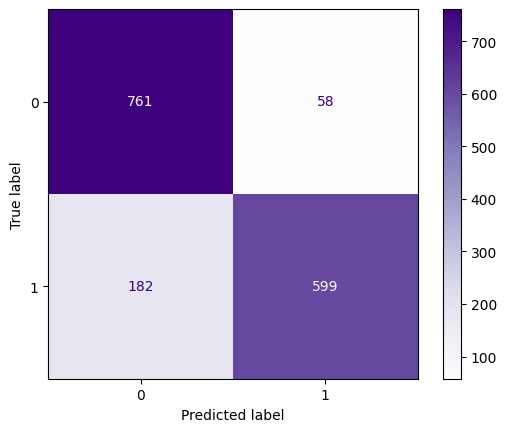

In [7]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(cmap='Purples')

<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#f9e2af">Linear Model - Logistic Regression</h2>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Creazione del modello</h4>

In [8]:
LogReg = LogisticRegression(max_iter=1000, random_state=0)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

# Show the performance of the Logistic Regression model
print(f'{sc.BRIGHT}LOGISTIC REGRESSION MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

LOGISTIC REGRESSION MODEL

Accuracy: 87.94%
Precision: 88.18%
Recall: 86.94%
F1 Score: 87.56%


In [9]:
# Make some predictions using the Logistic Regression model
for xtest, ytest in zip(X_test, y_test):
    ypred = LogReg.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {f"{fc.GREEN}CORRECT{fc.RESET}" if ypred == ytest else f"{fc.RED}WRONG{fc.RESET}"} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 1
Result: WRONG 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1.03358

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Cross-Validation del Modello</h4>

In [10]:
print(f'\n{sc.BRIGHT}KFOLD{sc.NORMAL}')
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(LogReg, X_values, y, cv=kf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')

print(f'\n{sc.BRIGHT}STRATIFIED KFOLD{sc.NORMAL}')
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(LogReg, X_values, y, cv=skf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')


KFOLD
Cross-Validation Accuracy (MEAN): 87.62%
Cross-Validation Accuracy (FOLD 1): 87.31%
Cross-Validation Accuracy (FOLD 2): 87.25%
Cross-Validation Accuracy (FOLD 3): 87.69%
Cross-Validation Accuracy (FOLD 4): 88.12%
Cross-Validation Accuracy (FOLD 5): 87.75%

STRATIFIED KFOLD
Cross-Validation Accuracy (MEAN): 87.79%
Cross-Validation Accuracy (FOLD 1): 85.81%
Cross-Validation Accuracy (FOLD 2): 88.88%
Cross-Validation Accuracy (FOLD 3): 88.50%
Cross-Validation Accuracy (FOLD 4): 89.25%
Cross-Validation Accuracy (FOLD 5): 86.50%


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Confusion Matrix</h4>

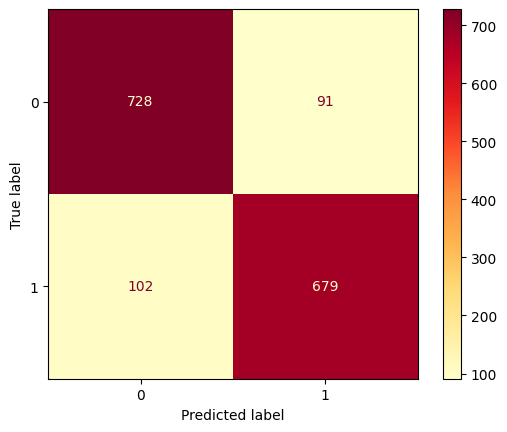

In [11]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(cmap='YlOrRd')

<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#89b4fa">Support Vector Classification - Support Vector Machine</h2>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Creazione del modello</h4>

In [12]:
SVM = SVC(random_state=0, probability=True)
SVM.fit(X_train, y_train)
Y_pred = SVM.predict(X_test)

# Show the performance of the SVM model
print(f'{sc.BRIGHT}SVM MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

SVM MODEL

Accuracy: 87.94%
Precision: 88.18%
Recall: 86.94%
F1 Score: 87.56%


In [13]:
# Make some predictions using the SVM model
for xtest, ytest in zip(X_test, y_test):
    ypred = SVM.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {f"{fc.GREEN}CORRECT{fc.RESET}" if ypred == ytest else f"{fc.RED}WRONG{fc.RESET}"} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Cross-Validation del Modello</h4>

In [14]:
print(f'\n{sc.BRIGHT}KFOLD{sc.NORMAL}')
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(SVM, X_values, y, cv=kf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')

print(f'\n{sc.BRIGHT}STRATIFIED KFOLD{sc.NORMAL}')
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(SVM, X_values, y, cv=skf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')


KFOLD
Cross-Validation Accuracy (MEAN): 98.12%
Cross-Validation Accuracy (FOLD 1): 97.56%
Cross-Validation Accuracy (FOLD 2): 97.44%
Cross-Validation Accuracy (FOLD 3): 98.50%
Cross-Validation Accuracy (FOLD 4): 98.44%
Cross-Validation Accuracy (FOLD 5): 98.69%

STRATIFIED KFOLD
Cross-Validation Accuracy (MEAN): 98.14%
Cross-Validation Accuracy (FOLD 1): 98.06%
Cross-Validation Accuracy (FOLD 2): 98.06%
Cross-Validation Accuracy (FOLD 3): 98.38%
Cross-Validation Accuracy (FOLD 4): 98.19%
Cross-Validation Accuracy (FOLD 5): 98.00%


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Confusion Matrix</h4>

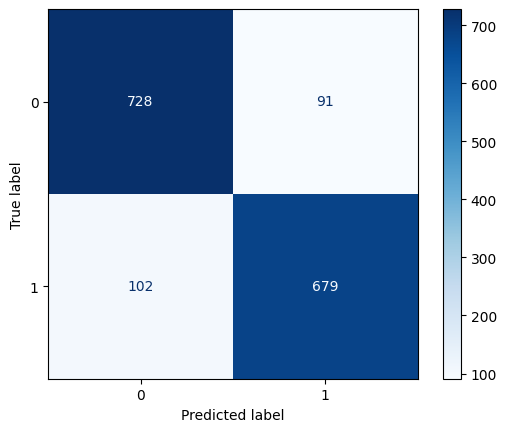

In [15]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(cmap='Blues')

<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#f38ba8">Bayes' theorem - Naive Bayes</h2>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Creazione del modello</h4>

In [16]:
NVGauss = GaussianNB()
NVGauss.fit(X_train, y_train)
y_pred = NVGauss.predict(X_test)

# Show the performance of the Naive Bayes model
print(f'{sc.BRIGHT}NAIVE BAYES MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

NAIVE BAYES MODEL

Accuracy: 89.12%
Precision: 90.41%
Recall: 86.94%
F1 Score: 88.64%


In [17]:
# Make some predictions using the Naive Bayes model
for xtest, ytest in zip(X_test, y_test):
    ypred = NVGauss.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {f"{fc.GREEN}CORRECT{fc.RESET}" if ypred == ytest else f"{fc.RED}WRONG{fc.RESET}"} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Cross-Validation del Modello</h4>

In [18]:
print(f'\n{sc.BRIGHT}KFOLD{sc.NORMAL}')
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(NVGauss, X_values, y, cv=kf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')

print(f'\n{sc.BRIGHT}STRATIFIED KFOLD{sc.NORMAL}')
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(NVGauss, X_values, y, cv=skf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')


KFOLD
Cross-Validation Accuracy (MEAN): 88.67%
Cross-Validation Accuracy (FOLD 1): 88.94%
Cross-Validation Accuracy (FOLD 2): 88.88%
Cross-Validation Accuracy (FOLD 3): 88.50%
Cross-Validation Accuracy (FOLD 4): 88.19%
Cross-Validation Accuracy (FOLD 5): 88.88%

STRATIFIED KFOLD
Cross-Validation Accuracy (MEAN): 88.64%
Cross-Validation Accuracy (FOLD 1): 88.38%
Cross-Validation Accuracy (FOLD 2): 88.50%
Cross-Validation Accuracy (FOLD 3): 88.75%
Cross-Validation Accuracy (FOLD 4): 88.69%
Cross-Validation Accuracy (FOLD 5): 88.88%


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Confusion Matrix</h4>

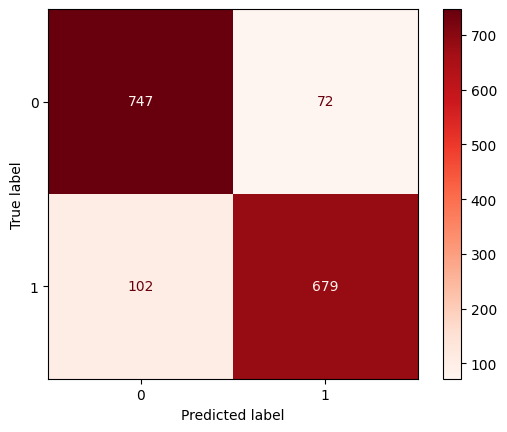

In [19]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(cmap='Reds')

<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#a6e3a1">Tree Algorithms - Random Forest</h2>

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Creazione del modello</h4>

In [20]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

# Show the performance of the Random Forest model
print(f'{sc.BRIGHT}RANDOM FOREST MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

RANDOM FOREST MODEL

Accuracy: 97.19%
Precision: 97.42%
Recall: 96.80%
F1 Score: 97.11%


In [21]:
# Make some predictions using the Random Forest model
for xtest, ytest in zip(X_test, y_test):
    ypred = RF.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {f"{fc.GREEN}CORRECT{fc.RESET}" if ypred == ytest else f"{fc.RED}WRONG{fc.RESET}"} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1

<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Cross-Validation del Modello</h4>

In [22]:
print(f'\n{sc.BRIGHT}KFOLD{sc.NORMAL}')
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(RF, X_values, y, cv=kf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')

print(f'\n{sc.BRIGHT}STRATIFIED KFOLD{sc.NORMAL}')
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(RF, X_values, y, cv=skf, scoring='accuracy')
# Print the cross-validation accuracy for each fold and the mean
print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(MEAN){fc.RESET}: {scores.mean()*100:.2f}%')
for i, score in enumerate(scores):
    print(f'{fc.RED}Cross-Validation Accuracy {fc.YELLOW}(FOLD {i+1}){fc.RESET}: {score*100:.2f}%')


KFOLD
Cross-Validation Accuracy (MEAN): 97.14%
Cross-Validation Accuracy (FOLD 1): 96.69%
Cross-Validation Accuracy (FOLD 2): 97.44%
Cross-Validation Accuracy (FOLD 3): 97.94%
Cross-Validation Accuracy (FOLD 4): 97.00%
Cross-Validation Accuracy (FOLD 5): 96.62%

STRATIFIED KFOLD
Cross-Validation Accuracy (MEAN): 96.96%
Cross-Validation Accuracy (FOLD 1): 97.19%
Cross-Validation Accuracy (FOLD 2): 96.81%
Cross-Validation Accuracy (FOLD 3): 97.25%
Cross-Validation Accuracy (FOLD 4): 96.31%
Cross-Validation Accuracy (FOLD 5): 97.25%


<h4 style="font-weight:bold;font-family:'JetBrains Mono';color:#cdd6f4">Confusion Matrix</h4>

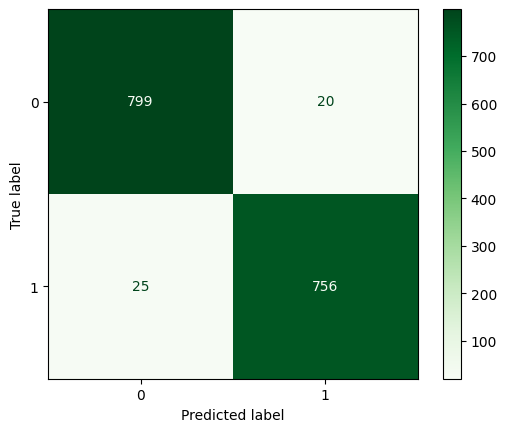

In [23]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y.unique()).plot(cmap='Greens')

<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#74c7ec">Metrics - ROC Curve</h2>

In [25]:
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
classifiers = [LogisticRegression(max_iter=1000, random_state=0), SVC(random_state=0, probability=True), GaussianNB(), RandomForestClassifier(random_state=0)]

fig = go.Figure()

for clf, model_name in zip(classifiers, model_names):
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    # Compute and print AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f"{fc.YELLOW + sc.BRIGHT}AUC of {model_name}:{fc.RESET + sc.NORMAL} {auc_score * 100:.2f}%")

    # Compute cross-validated AUC
    try:
        cv_auc = cross_val_score(clf, X_values, y, cv=5, scoring='roc_auc', error_score='raise')
    except:
        cv_auc = np.zeros(5)
    print(f"{fc.YELLOW + sc.BRIGHT}Cross-validated AUC of {model_name}:{fc.RESET + sc.NORMAL} {cv_auc.mean() * 100:.2f}%\n")

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_name} (AUC = {auc_score:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Baseline', line=dict(dash='dash')))
fig.update_layout(xaxis_title='False Positive Rate', yaxis_title='True Positive Rate', title='ROC Curve', showlegend=True, height=600, width=800)
fig.show()

AUC of Logistic Regression: 94.89%
Cross-validated AUC of Logistic Regression: 92.83%

AUC of SVM: 99.58%
Cross-validated AUC of SVM: 99.38%

AUC of Naive Bayes: 95.95%
Cross-validated AUC of Naive Bayes: 89.70%

AUC of Random Forest: 99.46%
Cross-validated AUC of Random Forest: 99.17%



<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#74c7ec">Features - RFECV</h2>

In [76]:
rfecv = RFECV(estimator=RandomForestClassifier(random_state=0), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print(f'{sc.BRIGHT}OPTIMAL NUMBER OF FEATURES{sc.NORMAL}')
print(f'{fc.RED}Optimal Number of Features{fc.RESET}: {rfecv.n_features_}')
print(f'{fc.GREEN}Selected Features{fc.RESET}: {X.columns[rfecv.support_].to_list()}')

# Drop the features that are not important
DatasetRFECV = Dataset.drop(Dataset.columns[np.where(rfecv.support_ == False)[0]], axis=1)
XRFECV = DatasetRFECV.drop('Quality', axis=1)
XRFECV_values = XRFECV.values
yRFECV = DatasetRFECV['Quality']
X_trainRFECV, X_testRFECV, y_trainRFECV, y_testRFECV = train_test_split(XRFECV_values, yRFECV, test_size=0.2, random_state=42)

print(f'{sc.BRIGHT}DATASET CHARACTERISTICS{sc.NORMAL}')
print(f'{fc.RED}Features{fc.RESET}: {X.columns.to_list()}')
print(f'{fc.GREEN}Target{fc.RESET}: {y.unique()}')
print(f'{fc.BLUE}Shape of the dataset{fc.RESET}: {Dataset.shape}')

# Output the dataset to a new CSV file
DatasetRFECV.to_csv('banana_quality_RFECV.csv', index=False)

OPTIMAL NUMBER OF FEATURES
Optimal Number of Features: 7
Selected Features: ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
DATASET CHARACTERISTICS
Features: ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
Target: [0 1]
Shape of the dataset: (8000, 8)


<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#74c7ec">Hyperparameters - Grid Search</h2><p>(132m51.3s)</p>

In [77]:
classifier = SVC(random_state=0, probability=True)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# Perform grid search
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the optimal parameters
print(f'{sc.BRIGHT}OPTIMAL PARAMETERS{sc.NORMAL}')
print(f'{fc.RED}Optimal Parameters{fc.RESET}: {grid_search.best_params_}')

# Make predictions using the best parameters
CompleteSVM = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'], random_state=0, probability=True)
CompleteSVM.fit(X_train, y_train)
y_pred = CompleteSVM.predict(X_test)

# Show the performance of the Random Forest model
print(f'{sc.BRIGHT}SVM MODEL{sc.NORMAL}\n')
print(f'{fc.RED}Accuracy{fc.RESET}: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.GREEN}Precision{fc.RESET}: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.BLUE}Recall{fc.RESET}: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'{fc.YELLOW}F1 Score{fc.RESET}: {f1_score(y_test, y_pred)*100:.2f}%')

OPTIMAL PARAMETERS
Optimal Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVM MODEL

Accuracy: 98.38%
Precision: 98.58%
Recall: 98.08%
F1 Score: 98.33%


<h2 style="font-weight:bold;font-family:'JetBrains Mono';color:#74c7ec">Model Saving</h2>

In [78]:
pkl.dump(CompleteSVM, open('banana_quality_model+SVM.pkl', 'wb'))

def checker(pred):
    global ErrorCount
    if pred:
        return f"{fc.GREEN}CORRECT{fc.RESET}"
    else:
        ErrorCount += 1
        return f"{fc.RED}WRONG{fc.RESET}"

# Make some predictions using the Imported Random Forest model
ImportSVM, ErrorCount = pkl.load(open('banana_quality_model+SVM.pkl', 'rb')), 0
for xtest, ytest in zip(X_test, y_test):
    ypred = ImportSVM.predict([xtest])[0]
    print(f'{fc.BLUE}Features{fc.RESET}: {xtest}')
    print(f'{fc.BLUE}Actual{fc.RESET}: {ytest}')
    print(f'{fc.BLUE}Predicted{fc.RESET}: {ypred}')
    print(f'{sc.BRIGHT}Result: {checker(ypred == ytest)} {sc.NORMAL}\n')

Features: [-0.20308691 -0.36750409 -0.31578825 -0.40436851  0.30551022  0.72662353
 -0.79491469]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.67231714 -1.01036267 -0.31759751  1.2734672   0.36553814  2.24192852
 -2.15395337]
Actual: 1
Predicted: 0
Result: WRONG 

Features: [ 0.33928839  0.98793417  2.84839449  0.52789852 -0.87747582 -0.86829228
  1.11355193]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.22334901 -0.56265703 -0.54555338 -0.51994497  0.13001362  1.2886337
 -0.66343196]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [ 0.46279282 -1.25282209 -0.81950281 -0.31109822  1.66825342 -0.29525877
 -1.23780383]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [ 0.53362822 -0.81672776 -0.62100494 -0.41614697  0.7383135   0.82020402
 -1.28597148]
Actual: 1
Predicted: 1
Result: CORRECT 

Features: [-0.09461807  0.13645481  1.33482927 -1.69680763 -1.48449958  0.81725947
  0.4479073 ]
Actual: 0
Predicted: 0
Result: CORRECT 

Features: [-0.27854173  1.17120085  1